In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, shutil
from PIL import Image
import csv

path="C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\img\\seq\\"
from IPython.display import clear_output
from IPython import display

%matplotlib inline

In [22]:
shutil.rmtree(path)
os.makedirs(path)


def upd_plot(new_seq=[]):
    display.clear_output(wait=True)
    plt.plot(new_seq)
    display.display(plt.show())

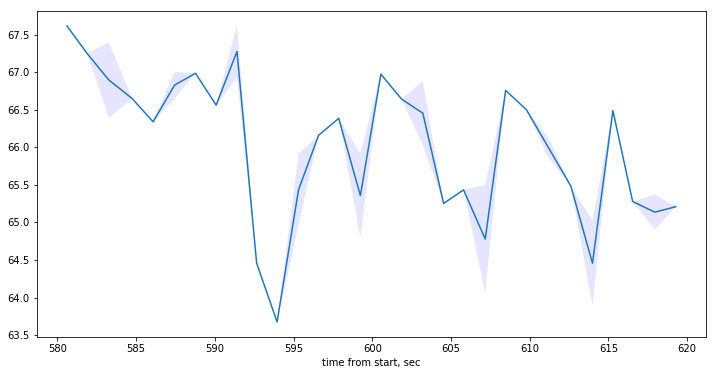

None

KeyboardInterrupt: 

In [100]:
files = []
intens = []
stddevs=[]
times=[]
start =time.time()
file_check_interval = 1.0
display_time = 30
time_ = 0.0
while True:
    num=0
    iter_start = time.time()
    ins = []
    for f in os.listdir(path):
        if f not in files:
            files.append(f)
            num+=1
            try:
                img = Image.open(''.join((path,f)))
            except PermissionError:
                time.sleep(0.2)
                img = Image.open(''.join((path,f)))
            except FileNotFoundError:
                pass
            ins.append(np.mean(img))
        else:
            os.remove(path+f)
            
    #clear_output()
    ints = np.mean(ins)
    sdev = np.std(ins)
    if not np.isnan(ints):
        intens.append(ints)
        stddevs.append(sdev)
        times.append(time.time()-start)

    points_num = int(display_time//file_check_interval)
    display_obj = (np.array(intens[-points_num:]),
                   np.array(stddevs[-points_num:]))
    
    print('found %i new files. total:%i. Intensity: %f, stddev %f'%
          (num, len(files), ints, sdev )) 
    display.clear_output(wait=True)
    f,ax = plt.subplots(figsize=(12,6))
    # plot intensities
    ax.plot(times[-points_num:],display_obj[0])
    # plot standart deviation
    ax.fill_between(times[-points_num:], display_obj[0]+display_obj[1],
                     display_obj[0]-display_obj[1], facecolor='blue', alpha=0.1)
    plt.xlabel('time from start, sec')

    display.display(plt.show())
    time.sleep(file_check_interval)
    print(time.time()- iter_start)


In [101]:
# SAVING TO FILE
save_to="C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\data\\"+\
        "data_%s.csv"%time.strftime('%d-%m-%Y_%H-%M')

print('total number of points: %i'%len(intens))
result = np.array(intens)
## times = np.arange(0,len(intens),file_check_interval)
data = np.stack((result,times)).T
print(data.shape)
np.savetxt(save_to,data,delimiter=',',fmt='%10.5f')
print ("saved to %s"%save_to)

total number of points: 459
(459, 2)
saved to C:\Users\ЛФКИТ-3\Documents\Interferom\data\data_23-05-2018_19-38.csv


In [33]:
time.strftime('-%x-%H:%M')


'-05/23/18-18:15'

In [44]:
np.isnan(intens[0])

True